In [8]:
# !source ../venv/bin/activate && python3 -m pip install -r ../requirements/requirements-viz.txt
import os

import folium
import matplotlib.pyplot as plt
from branca.colormap import linear
from folium.features import GeoJsonTooltip

filetypes = ["pdf"]
PLOT_FOLDER = "./maps/"
os.makedirs(PLOT_FOLDER, exist_ok=True)

# Maps of Japan with japandata.maps

## Load maps with load_map

In [9]:
from japandata.maps import load_map

year = 2015  # Chooses the most recent map made up to year
quality = "coarse"  # 'stylized', 'coarse', 'low', 'medium', 'high'
scale = "jp_city_dc "  # "jp", "jp_pref", "jp_city_dc", "jp_city"
city_dc_map = load_map(date=year, scale="jp_city_dc", quality=quality)

load_map returns a geopandas dataframe

In [10]:
city_dc_map.sample(5)

,prefecture,bureau,county,city,code,special,geometry
1165,兵庫県,NaN,NaN,伊丹市,28207,NaN,"MULTIPOLYGON (((135.40066 34.80833, 135.40420 ..."
750,新潟県,NaN,中魚沼郡,津南町,15482,NaN,"MULTIPOLYGON (((138.70044 36.86823, 138.70621 ..."
1278,鳥取県,NaN,東伯郡,琴浦町,31371,NaN,"MULTIPOLYGON (((133.71742 35.50401, 133.72199 ..."
1341,広島県,NaN,NaN,庄原市,34210,NaN,"MULTIPOLYGON (((133.32885 34.85305, 133.31972 ..."
1309,岡山県,NaN,NaN,玉野市,33204,NaN,"MULTIPOLYGON (((134.02389 34.50685, 134.02112 ..."


## Draw maps with matplotlib 

/Users/sam/Projects/civic/japandata/venv/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()
/Users/sam/Projects/civic/japandata/venv/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()


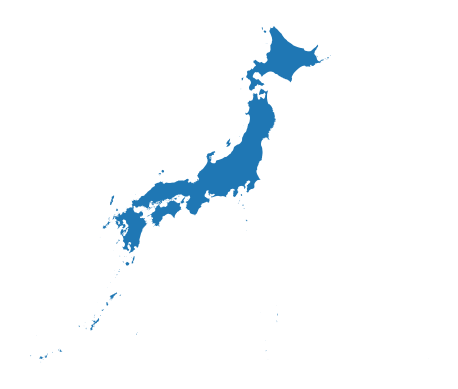

In [11]:
## Map of all of japan
japan_map = load_map(date=2022, scale="jp", quality="stylized")

fig, ax = plt.subplots()
japan_map.plot(ax=ax)
ax.set_axis_off()
for filetype in filetypes:
    fig.savefig(PLOT_FOLDER + "japan." + filetype, transparent=True)

/Users/sam/Projects/civic/japandata/venv/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()
/Users/sam/Projects/civic/japandata/venv/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()


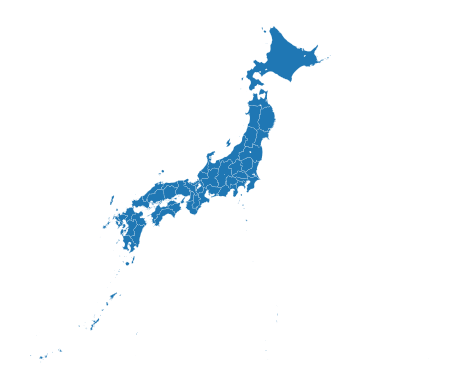

In [22]:
## Map of all the prectures
pref_map = load_map(date=1980, scale="jp_pref", quality="stylized")

fig, ax = plt.subplots()
pref_map.plot(ax=ax, edgecolor="w", lw=0.1)
ax.set_axis_off()
for filetype in filetypes:
    fig.savefig(PLOT_FOLDER + "pref." + filetype, transparent=True)

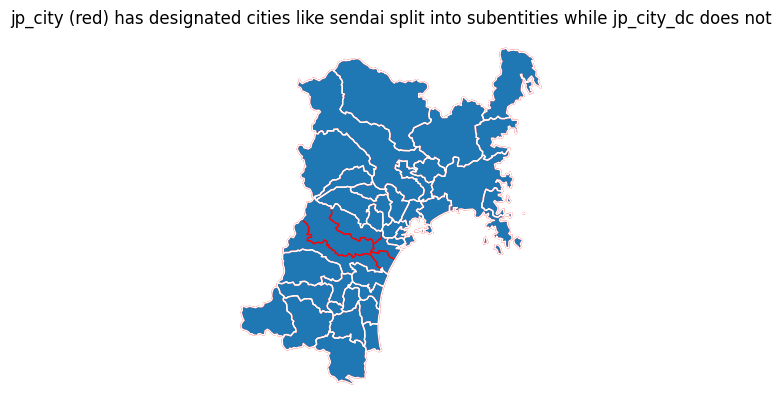

In [13]:
## Maps of all the cities (municipalities)
city_map = load_map(date=2022, scale="jp_city", quality="coarse")
miyagi_city = city_map[city_map["prefecture"] == "宮城県"]
city_dc_map = load_map(date=2022, scale="jp_city_dc", quality="coarse")
miyagi_city_dc = city_dc_map[city_dc_map["prefecture"] == "宮城県"]

fig, ax = plt.subplots()
miyagi_city.plot(ax=ax, edgecolor="r", lw=1)
miyagi_city_dc.plot(ax=ax, edgecolor="w", facecolor="none", lw=1)
ax.set_axis_off()
ax.set_title(
    "jp_city (red) has designated cities like sendai split into subentities. jp_city_dc does not"
)
for filetype in filetypes:
    fig.savefig(PLOT_FOLDER + "city_dc." + filetype, transparent=True)

In [14]:
plt.close("all")

## Maps are available in a range of quality levels

/Users/sam/Projects/civic/japandata/venv/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()


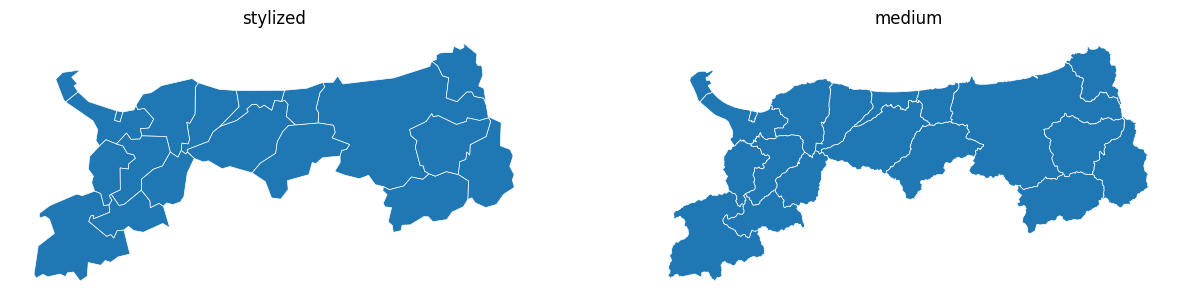

In [17]:
qualities = ["stylized", "medium"] # try also coarse, low, high

fig, axes = plt.subplots(nrows=1, ncols=len(qualities), figsize=(15, 10))

for i, quality in enumerate(qualities):
    city_dc_map = load_map(date=2022, scale="jp_city_dc", quality=quality)
    zoom_map = city_dc_map[city_dc_map["prefecture"] == "鳥取県"]
    zoom_map.plot(ax=axes[i], edgecolor="w", lw=0.5)
    axes[i].set_title(quality)
    axes[i].set_axis_off()

## and for a range of time periods

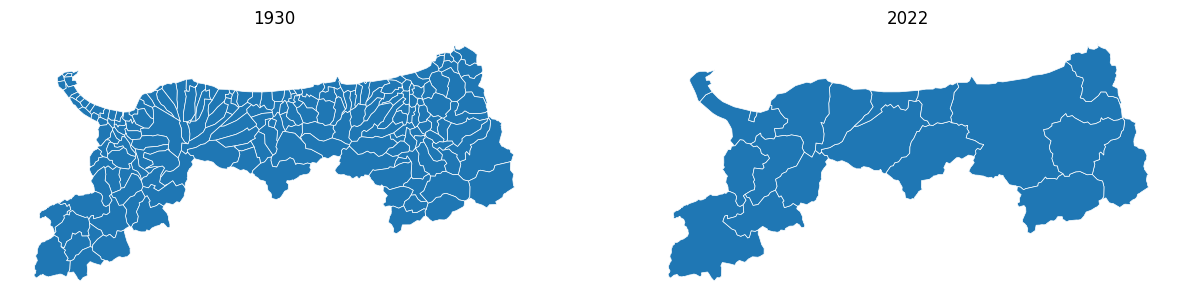

In [18]:
years = ["1930", "2022"]

fig, axes = plt.subplots(nrows=1, ncols=len(qualities), figsize=(15, 10))

for i, year in enumerate(years):
    city_dc_map = load_map(date=year, scale="jp_city_dc", quality="coarse")
    zoom_map = city_dc_map[city_dc_map["prefecture"] == "鳥取県"]
    zoom_map.plot(ax=axes[i], edgecolor="w", lw=0.5)
    axes[i].set_title(year)
    axes[i].set_axis_off()

## Make interactive maps with geopandas/folium

In [23]:
unhighlighted_style = {
    "fillOpacity": .3,
}

highlighted_style = unhighlighted_style | {"fillOpacity": .6}

tooltipstyle = """
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """

map_style = {
    "zoom_start": 5,
    #"tiles": "None",
    "attr": " ",
}

pref_map = load_map(date=1980, scale="jp_pref", quality="stylized")

m = folium.Map(**map_style | {"location": [35.67, 139]})

tooltip = GeoJsonTooltip(
    fields=["prefecture"],
    aliases=["Prefecture:"],
    localize=True,
    sticky=False,
    labels=True,
    style=tooltipstyle,
    max_width=800,
)

folium.GeoJson(
    pref_map,
    style_function=lambda feature: unhighlighted_style,
    highlight_function=lambda feature: highlighted_style,
    zoom_on_click=True,
    tooltip=tooltip,
).add_to(m)

m.save(PLOT_FOLDER + "pref_interactive.html")

m

/Users/sam/Projects/civic/japandata/venv/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()
/Users/sam/Projects/civic/japandata/venv/lib/python3.10/site-packages/topojson/core/dedup.py:107: RuntimeWarning: invalid value encountered in cast
  data["bookkeeping_shared_arcs"] = array_bk_sarcs.astype(np.int64).tolist()


## See the full list of available maps

In [74]:
from japandata.maps import AVAILABLE_MAPS

AVAILABLE_MAPS

{'1920-01-01': {'jp': ['c'],
  'jp_pref': ['c', 'l', 'i', 'h'],
  'jp_city_dc': ['c', 'l', 'i', 'h'],
  'jp_city': ['c', 'l', 'i', 'h']},
 '1950-10-01': {'jp': ['c'],
  'jp_pref': ['c', 'l', 'i', 'h'],
  'jp_city_dc': ['c', 'l', 'i', 'h'],
  'jp_city': ['c', 'l', 'i', 'h']},
 '1955-10-01': {'jp': ['c'],
  'jp_pref': ['c', 'l', 'i', 'h'],
  'jp_city_dc': ['c', 'l', 'i', 'h'],
  'jp_city': ['c', 'l', 'i', 'h']},
 '1960-10-01': {'jp': ['c'],
  'jp_pref': ['c', 'l', 'i', 'h'],
  'jp_city_dc': ['c', 'l', 'i', 'h'],
  'jp_city': ['c', 'l', 'i', 'h']},
 '1965-10-01': {'jp': ['c'],
  'jp_pref': ['c', 'l', 'i', 'h'],
  'jp_city_dc': ['c', 'l', 'i', 'h'],
  'jp_city': ['c', 'l', 'i', 'h']},
 '1970-10-01': {'jp': ['c'],
  'jp_pref': ['c', 'l', 'i', 'h'],
  'jp_city_dc': ['c', 'l', 'i', 'h'],
  'jp_city': ['c', 'l', 'i', 'h']},
 '1975-10-01': {'jp': ['c'],
  'jp_pref': ['c', 'l', 'i', 'h'],
  'jp_city_dc': ['c', 'l', 'i', 'h'],
  'jp_city': ['c', 'l', 'i', 'h']},
 '1980-10-01': {'jp': ['c'],
  'jp

- c: coarse
- l: low
- i: medium
- h: high
- s: stylized

Note that a stylized map 's' can always be requested even if not in the list above. `japandata.maps` will make one by downsampling a coarse map.

## Compute the area of Japan from the maps

This method is slow at higher map accuracy levels.
Ref for EPSG codes: https://lemulus.me/column/epsg-list-gis

In [75]:
city_dc_map = load_map(2020, "jp_city_dc", "coarse")
area = city_dc_map.to_crs(6677).area.sum() / 10**6  # square kilometers
print(f"Japan has an area of {int(area)} km^2")

Japan has an area of 374530 km^2


For reference, Wikipedia reports an area of 377,973 km^2.